### Implementing Classification on MNIST Original Digits Dataset

In [1]:
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

The MNIST Original Dataset is no longer available through sklearn, use the following link to load the dataset

Download the mat file of the dataset from this link - https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat

You can refer to this link for detailed information - https://github.com/ageron/handson-ml/issues/7

In [13]:
mnist_path = './mnist-original.mat'
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [28]:
print('Image Data Shape', mnist['data'].shape)

print('Label Data Shape', mnist['target'].shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [29]:
# Splitting Data in Training and Testing Data
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=1/7.0, random_state=0)

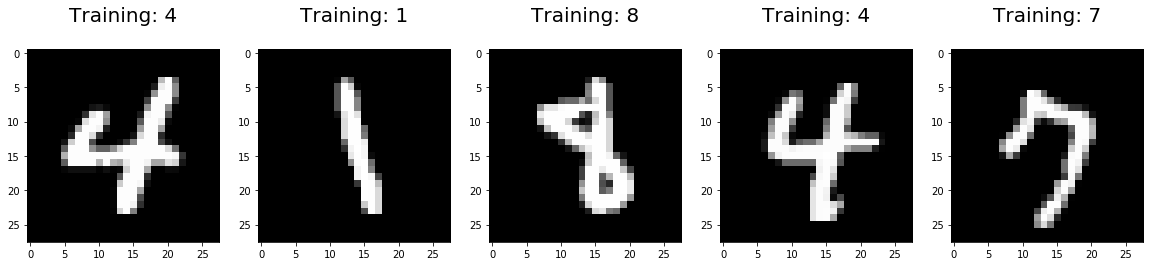

In [20]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [22]:
# Instantiating the Logistic Regression Model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [23]:
# Fitting the Logistic Regression Model
logisticRegr.fit(train_img, train_lbl)

/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs f

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# Making predictions over the whole testing dataset
predictions = logisticRegr.predict(test_img)

In [25]:
# Calculating Accuracy of the model predictions
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134


Displaying Misclassified Images 

In [26]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

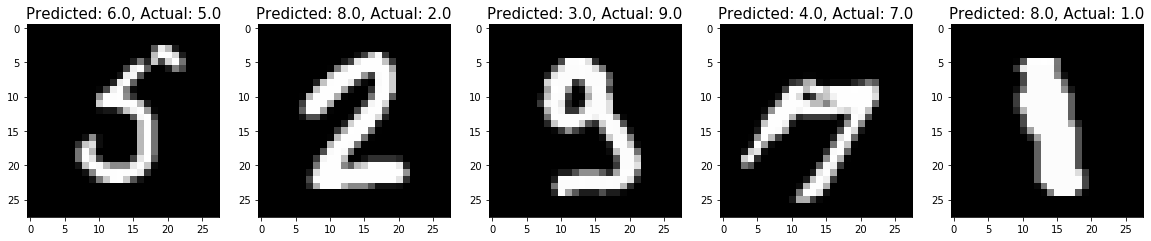

In [27]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)